In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


# **Introduction**

**Author: [Eman Zahid](https://www.linkedin.com/in/eman-zahid-b384a6300/)**

**Project: [Perform EDA on Supermarket Sales Dataset](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)**


# **Meta Data**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset. e data analytics purpose.

## **Attribute information**
  
* Invoice id: Computer generated sales slip invoice identification number
* Branch: Branch of supercenter (3 branches are available identified by A, B and C).
* City: Location of supercenters
* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
* Gender: Gender type of customer
* Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and * 
  beauty, Home and lifestyle, Sports and travel
* Unit price: Price of each product in $
* Quantity: Number of products purchased by customer
* Tax: 5% tax fee for customer buying
* Total: Total price including tax
* Date: Date of purchase (Record available from January 2019 to March 2019)
* Time: Purchase time (10am to 9pm)
* Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
* COGS: Cost of goods sold
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income
* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)


# **Step 1: Import the Libraries**

In [2]:
#import libraries

#1. to handle the data
import pandas as pd
import numpy as np
#2. to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#3. to pre-process the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer
#import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **Step 2: Load the Dataset**

In [6]:
df = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')
#display top rows of the data 
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# **Step 3: Exploratory Data Analysis**



## Preview the Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

* There is no missing value in the dataset.

In [9]:
#shape of data 
df.shape

(1000, 17)

In [11]:
#column names
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Explore each column

**Invoice ID**

In [7]:
df['Invoice ID']

0      750-67-8428
1      226-31-3081
2      631-41-3108
3      123-19-1176
4      373-73-7910
          ...     
995    233-67-5758
996    303-96-2227
997    727-02-1313
998    347-56-2442
999    849-09-3807
Name: Invoice ID, Length: 1000, dtype: object

In [10]:
#lets check if there is any duplicate invoice id
df['Invoice ID'].nunique()

1000

**Branch** 
(Branch of supercenters)

In [12]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

<Axes: xlabel='Branch', ylabel='count'>

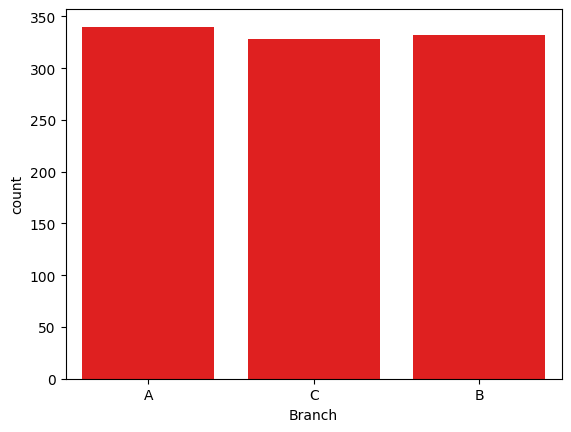

In [18]:
#plot
sns.countplot(x='Branch', data=df, color='red')

**City**

In [19]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

**Customer type**

Unique Customer Types:
Customer type
Member    501
Normal    499
Name: count, dtype: int64


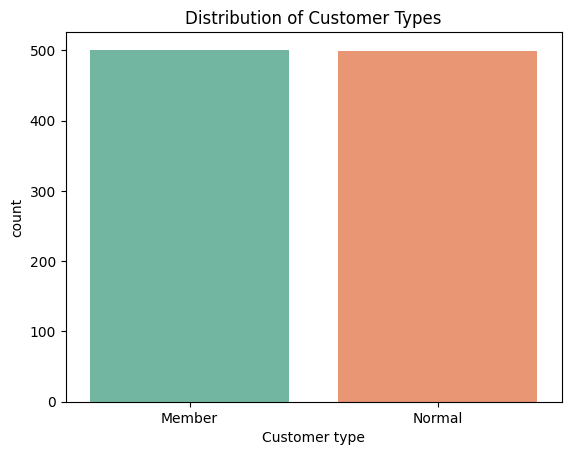

In [26]:
#Customer Type
print("Unique Customer Types:")
print(df['Customer type'].value_counts())  # Frequency of each type
sns.countplot(x='Customer type', data=df, palette='Set2')
plt.title("Distribution of Customer Types")
plt.show()

* Very slight difference

**Gender**

Unique Genders:
Gender
Female    501
Male      499
Name: count, dtype: int64


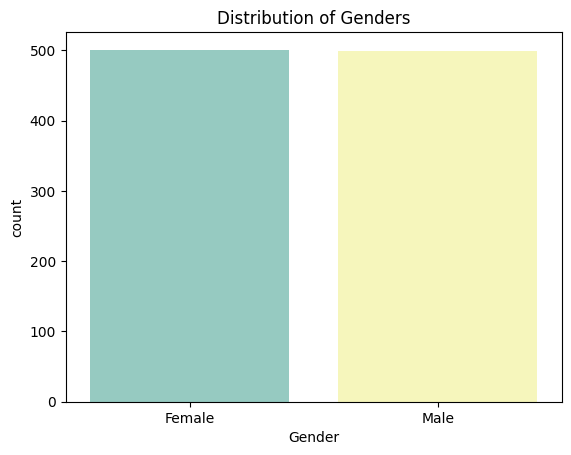

In [28]:
print("Unique Genders:")
print(df['Gender'].value_counts())  # Frequency of each gender
sns.countplot(x='Gender', data=df, palette='Set3')
plt.title("Distribution of Genders")
plt.show()

**Product Line**

Unique Product Lines:
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


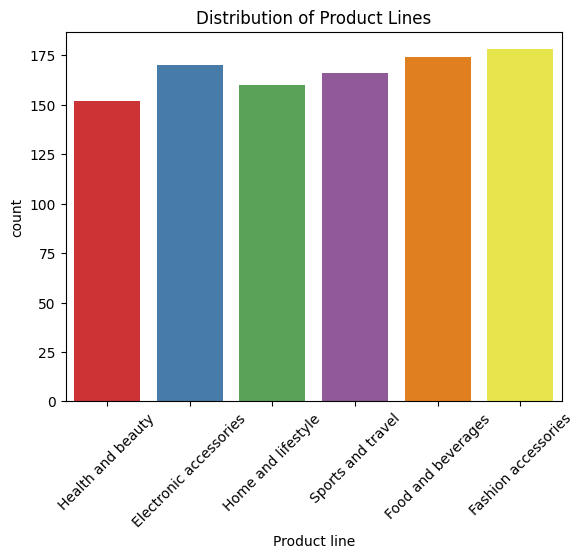

In [30]:
print("Unique Product Lines:")
print(df['Product line'].value_counts())  # Frequency of each product line
sns.countplot(x='Product line', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.title("Distribution of Product Lines")
plt.show()

**Unit Price**

Unit Price Statistics:
count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: Unit price, dtype: float64


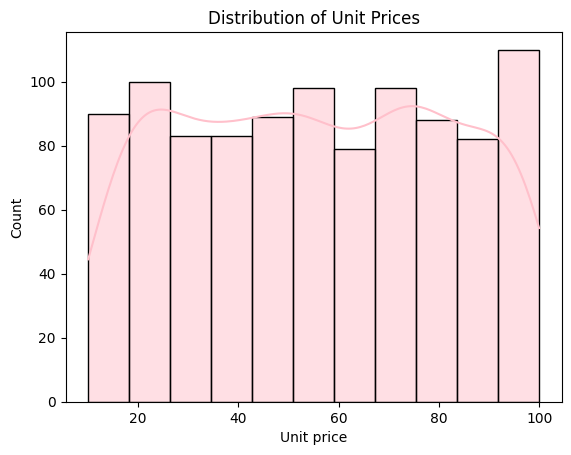

In [33]:
print("Unit Price Statistics:")
print(df['Unit price'].describe())  # Summary statistics for unit price
sns.histplot(df['Unit price'], kde=True, color='pink')
plt.title("Distribution of Unit Prices")
plt.show()

**Quantity**

Quantity Statistics:
count    1000.000000
mean        5.510000
std         2.923431
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Quantity, dtype: float64


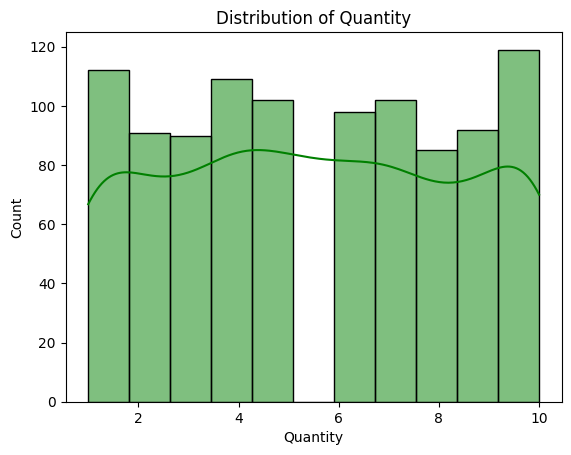

In [35]:
print("Quantity Statistics:")
print(df['Quantity'].describe())  # Summary statistics for quantity
sns.histplot(df['Quantity'], kde=True, color='green')
plt.title("Distribution of Quantity")
plt.show()


**Tax 5%**

Tax 5% Statistics:
count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax 5%, dtype: float64


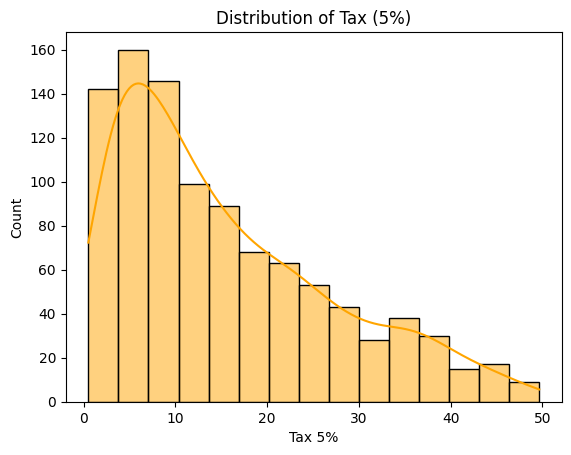

In [37]:
print("Tax 5% Statistics:")
print(df['Tax 5%'].describe())  # Summary statistics for tax
sns.histplot(df['Tax 5%'], kde=True, color='orange')
plt.title("Distribution of Tax (5%)")
plt.show()

**Total**

Total Statistics:
count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64


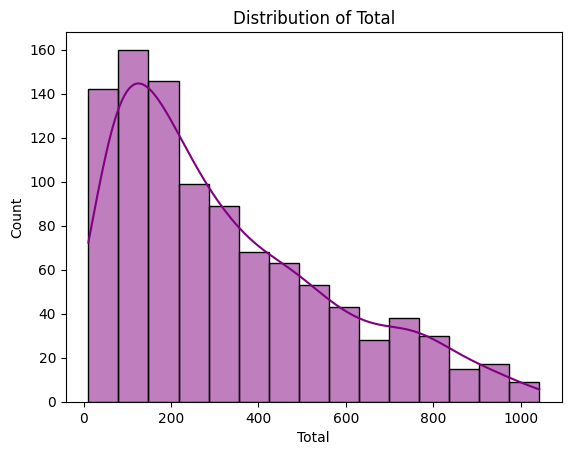

In [39]:
print("Total Statistics:")
print(df['Total'].describe())  # Summary statistics for total
sns.histplot(df['Total'], kde=True, color='purple')
plt.title("Distribution of Total")
plt.show()

**Date**

Date Range:
From 1/1/2019 to 3/9/2019


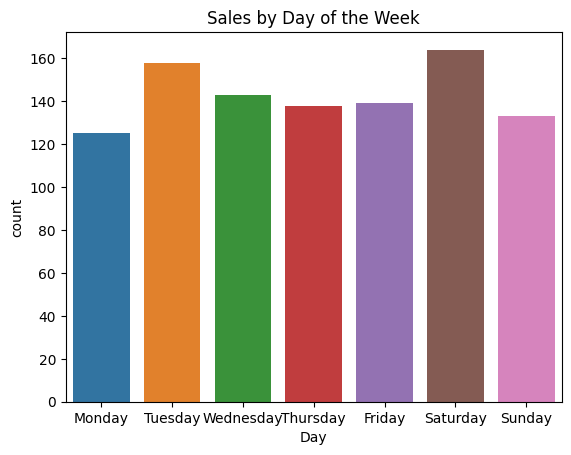

In [42]:
print("Date Range:")
print(f"From {df['Date'].min()} to {df['Date'].max()}")  # Date range
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()  # Extract day of the week
sns.countplot(x='Day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Sales by Day of the Week")
plt.show()

**Time**

Unique Time Entries:
0    13:08
1    10:29
2    13:23
3    20:33
4    10:37
Name: Time, dtype: object


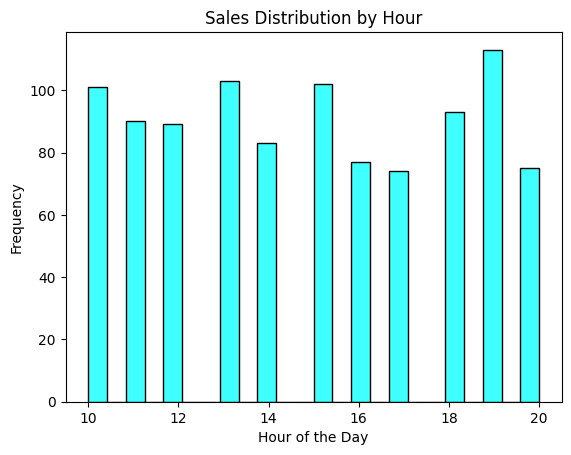

In [43]:
print("Unique Time Entries:")
print(df['Time'].head())  # Preview of time column
df['Hour'] = pd.to_datetime(df['Time']).dt.hour  # Extract hour
sns.histplot(df['Hour'], bins=24, kde=False, color='cyan')
plt.title("Sales Distribution by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.show()

**Payment**

Payment Method Distribution:
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


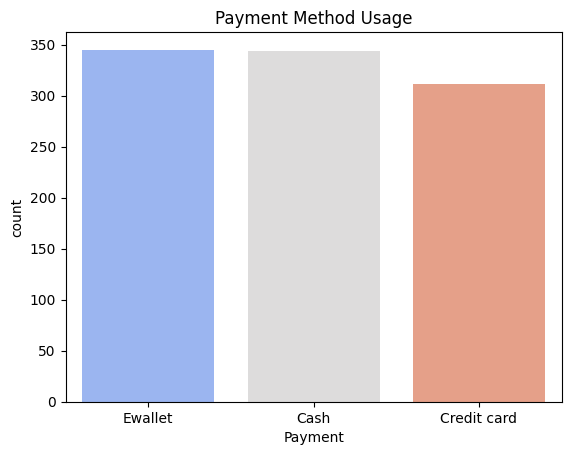

In [44]:
print("Payment Method Distribution:")
print(df['Payment'].value_counts())  # Frequency of payment methods
sns.countplot(x='Payment', data=df, palette='coolwarm')
plt.title("Payment Method Usage")
plt.show()

**Cost of Goods Sold (cogs)**

cogs Statistics:
count    1000.00000
mean      307.58738
std       234.17651
min        10.17000
25%       118.49750
50%       241.76000
75%       448.90500
max       993.00000
Name: cogs, dtype: float64


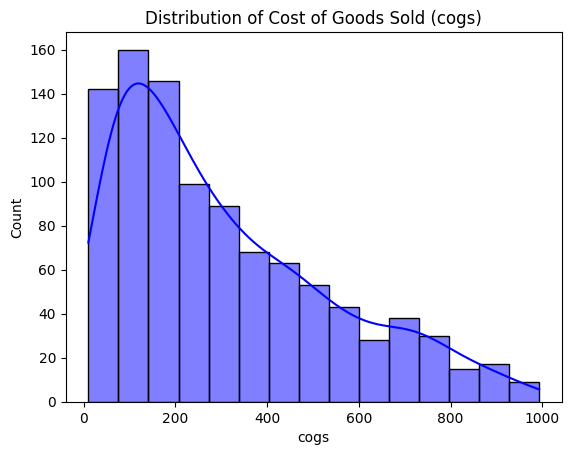

In [46]:
print("cogs Statistics:")
print(df['cogs'].describe())  # Summary statistics for cogs
sns.histplot(df['cogs'], kde=True, color='blue')
plt.title("Distribution of Cost of Goods Sold (cogs)")
plt.show()

**gross margin percentage**

In [52]:
print("Gross Margin Percentage:")
print(df['gross margin percentage'].unique())  # Unique values
print("All values are:", df['gross margin percentage'].iloc[0], "%")

Gross Margin Percentage:
[4.76190476]
All values are: 4.761904762 %


**gross income**

Gross Income Statistics:
count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: gross income, dtype: float64


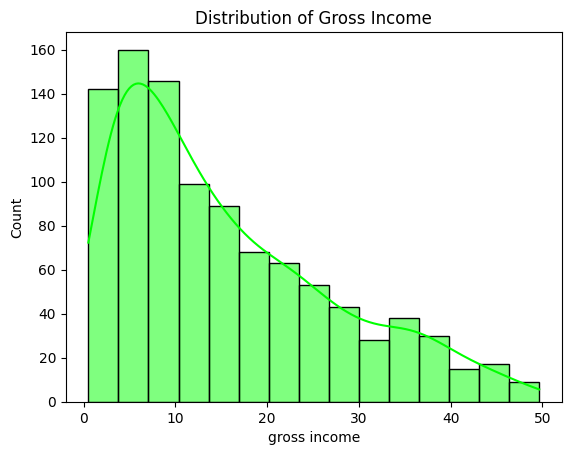

In [53]:
print("Gross Income Statistics:")
print(df['gross income'].describe())  # Summary statistics for gross income
sns.histplot(df['gross income'], kde=True, color='lime')
plt.title("Distribution of Gross Income")
plt.show()

**Rating**

Rating Statistics:
count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64


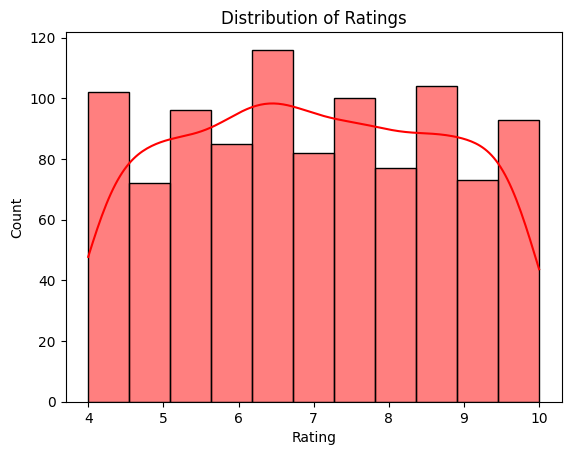

In [54]:
print("Rating Statistics:")
print(df['Rating'].describe())  # Summary statistics for rating
sns.histplot(df['Rating'], kde=True, color='red')
plt.title("Distribution of Ratings")
plt.show()

## Find Relationship between Variables

### **1. Do different branches have varying average ratings?**

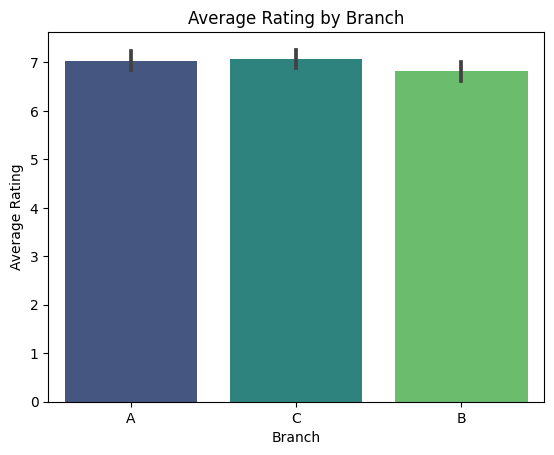

In [55]:
# Average ratings by branch
sns.barplot(x='Branch', y='Rating', data=df, palette='viridis')
plt.title("Average Rating by Branch")
plt.ylabel("Average Rating")
plt.show()


### **2. Does the product line influence the quantity sold?**

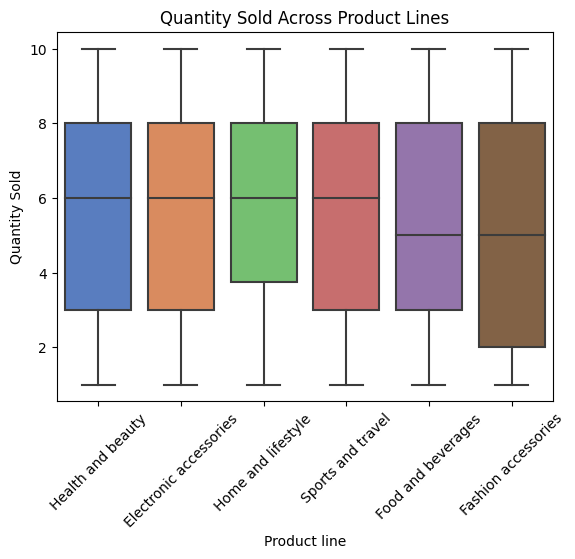

In [56]:
# Boxplot of quantity sold by product line
sns.boxplot(x='Product line', y='Quantity', data=df, palette='muted')
plt.xticks(rotation=45)
plt.title("Quantity Sold Across Product Lines")
plt.ylabel("Quantity Sold")
plt.show()


### **3. Are certain payment methods preferred by gender?**

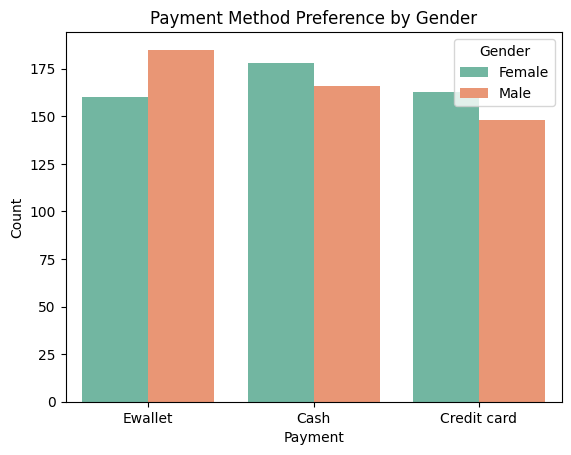

In [58]:
# Payment method preference by gender
sns.countplot(x='Payment', hue='Gender', data=df, palette='Set2')
plt.title("Payment Method Preference by Gender")
plt.ylabel("Count")
plt.show()


### **4. Is there a relationship between unit price and total income (Total column)?**

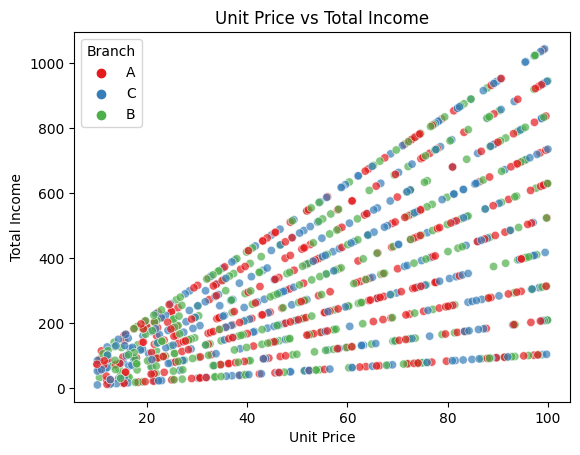

In [59]:
# Scatter plot of unit price vs total
sns.scatterplot(x='Unit price', y='Total', data=df, hue='Branch', palette='Set1', alpha=0.7)
plt.title("Unit Price vs Total Income")
plt.xlabel("Unit Price")
plt.ylabel("Total Income")
plt.show()


### **5. Which product line generates the most gross income?**

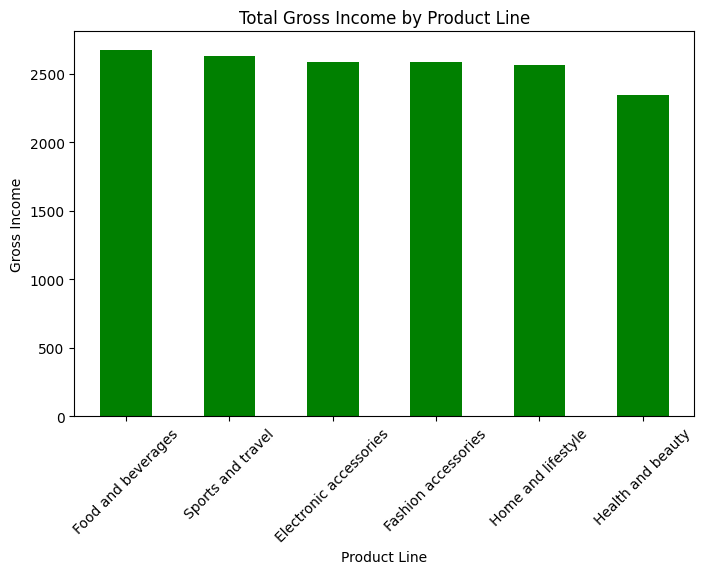

In [62]:
# Gross income by product line
gross_income_by_product_line = df.groupby('Product line')['gross income'].sum().sort_values(ascending=False)
gross_income_by_product_line.plot(kind='bar', color='green', figsize=(8, 5))
plt.title("Total Gross Income by Product Line")
plt.ylabel("Gross Income")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.show()


### **6. Does the customer type (Member/Normal) influence the rating?**

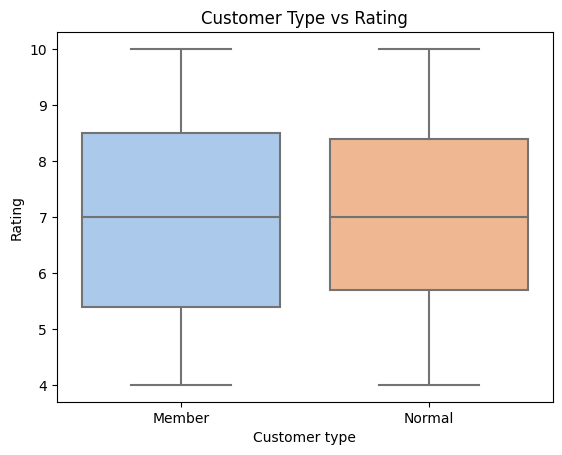

In [63]:
# Boxplot of ratings by customer type
sns.boxplot(x='Customer type', y='Rating', data=df, palette='pastel')
plt.title("Customer Type vs Rating")
plt.ylabel("Rating")
plt.show()


### **7. Do ratings vary across cities?**


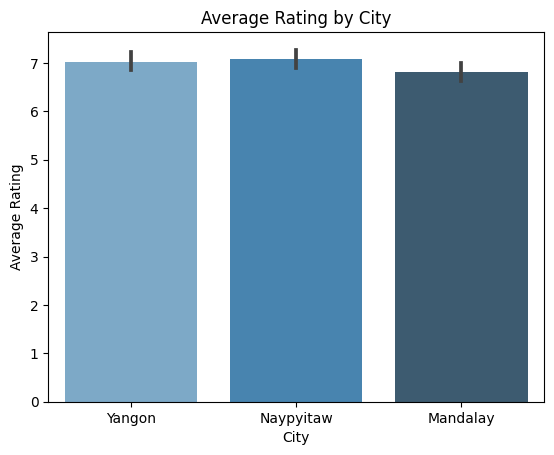

In [64]:
# Average ratings by city
sns.barplot(x='City', y='Rating', data=df, palette='Blues_d')
plt.title("Average Rating by City")
plt.ylabel("Average Rating")
plt.show()


### **8. What is the sales trend by hour of the day?**

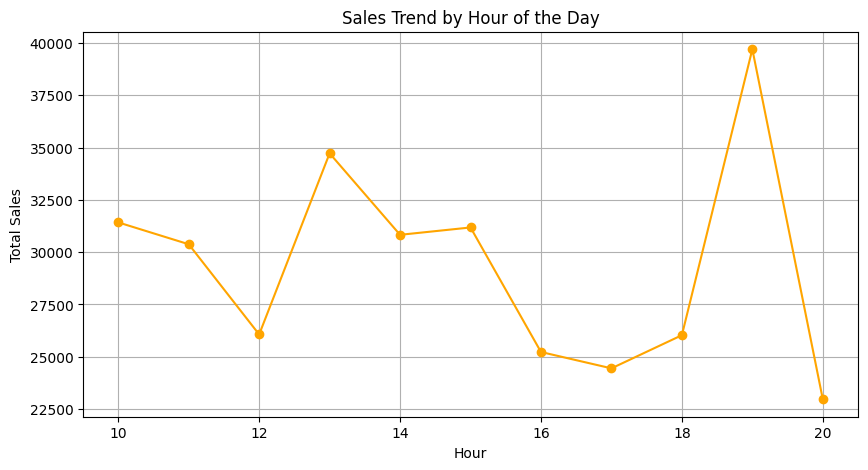

In [65]:
# Sales by hour
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
sales_by_hour = df.groupby('Hour')['Total'].sum()
sales_by_hour.plot(kind='line', marker='o', color='orange', figsize=(10, 5))
plt.title("Sales Trend by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


### **9. Are members spending more than normal customers?**

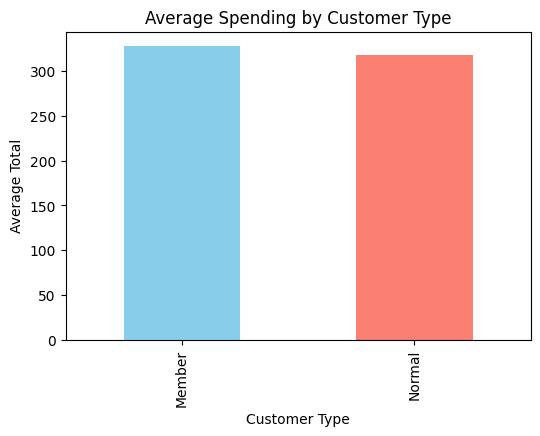

In [66]:
# Total spending by customer type
spending_by_customer_type = df.groupby('Customer type')['Total'].mean()
spending_by_customer_type.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(6, 4))
plt.title("Average Spending by Customer Type")
plt.ylabel("Average Total")
plt.xlabel("Customer Type")
plt.show()


### **10. Do specific branches have higher total sales for particular product lines?**


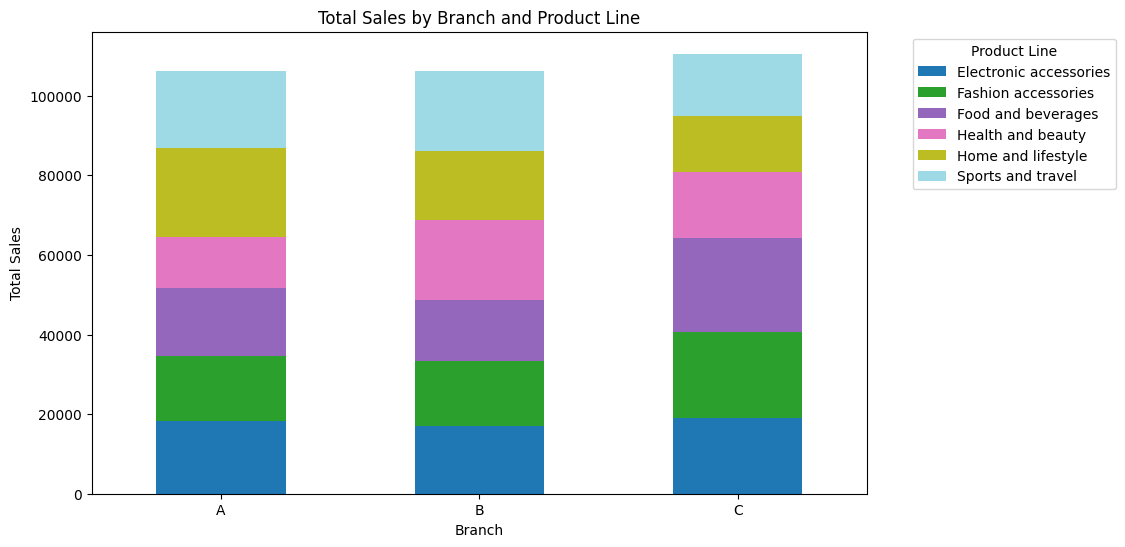

In [67]:
# Total sales by branch and product line
branch_product_sales = df.groupby(['Branch', 'Product line'])['Total'].sum().unstack()
branch_product_sales.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='tab20')
plt.title("Total Sales by Branch and Product Line")
plt.ylabel("Total Sales")
plt.xlabel("Branch")
plt.xticks(rotation=0)
plt.legend(title="Product Line", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### **11. Does gross income vary by gender and customer type?**

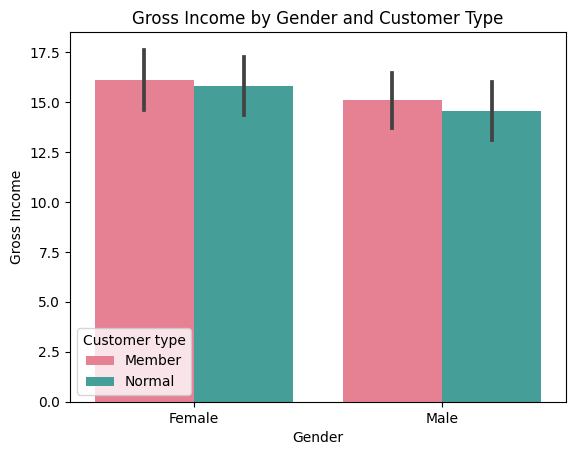

In [68]:
# Gross income by gender and customer type
sns.barplot(x='Gender', y='gross income', hue='Customer type', data=df, palette='husl')
plt.title("Gross Income by Gender and Customer Type")
plt.ylabel("Gross Income")
plt.show()


### **12. Which day of the week has the highest sales?**

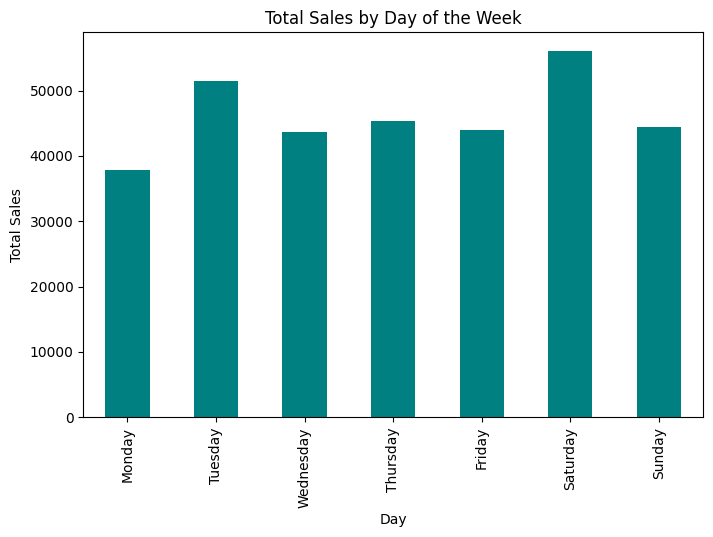

In [70]:
# Sales by day of the week
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()
sales_by_day = df.groupby('Day')['Total'].sum()
sales_by_day = sales_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Order by week
sales_by_day.plot(kind='bar', color='teal', figsize=(8, 5))
plt.title("Total Sales by Day of the Week")
plt.ylabel("Total Sales")
plt.xlabel("Day")
plt.show()


### **13. How does the branch impact the gross income?**

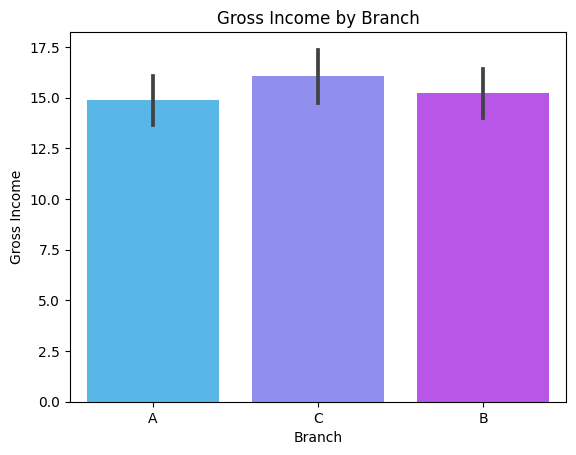

In [71]:
# Gross income by branch
sns.barplot(x='Branch', y='gross income', data=df, palette='cool')
plt.title("Gross Income by Branch")
plt.ylabel("Gross Income")
plt.show()


### **14. Does quantity sold affect ratings?**

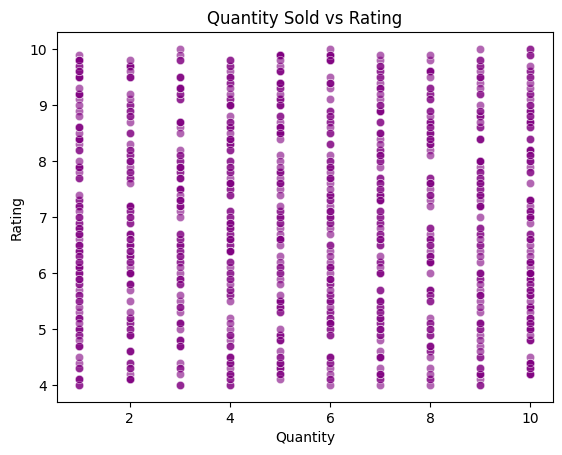

In [72]:
# Scatter plot of quantity vs rating
sns.scatterplot(x='Quantity', y='Rating', data=df, color='purple', alpha=0.6)
plt.title("Quantity Sold vs Rating")
plt.xlabel("Quantity")
plt.ylabel("Rating")
plt.show()


### **15. What is the relationship between cogs and total sales?**

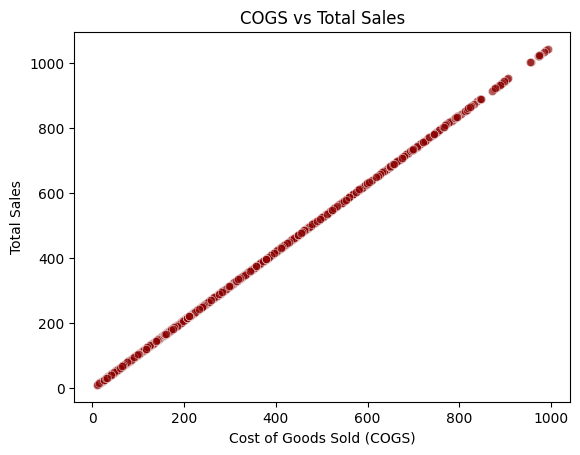

In [73]:
# Scatter plot of cogs vs total
sns.scatterplot(x='cogs', y='Total', data=df, color='darkred', alpha=0.6)
plt.title("COGS vs Total Sales")
plt.xlabel("Cost of Goods Sold (COGS)")
plt.ylabel("Total Sales")
plt.show()


### **Sales by Gender**

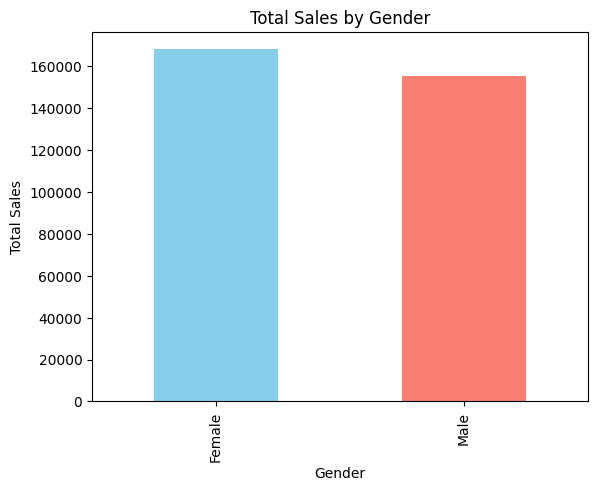

In [74]:
# Sales by gender
sales_by_gender = df.groupby('Gender')['Total'].sum()
sales_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Total Sales by Gender")
plt.ylabel("Total Sales")
plt.xlabel("Gender")
plt.show()


### **Sales by Product Category**

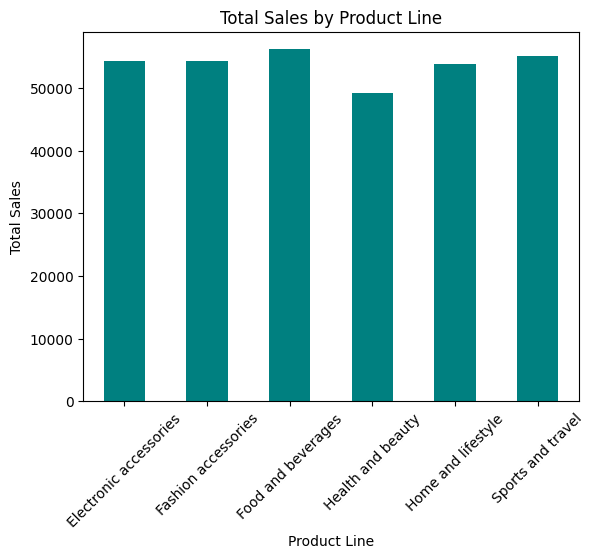

In [75]:
# Sales by product line
sales_by_product = df.groupby('Product line')['Total'].sum()
sales_by_product.plot(kind='bar', color='teal')
plt.title("Total Sales by Product Line")
plt.ylabel("Total Sales")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.show()


### **Correlation**

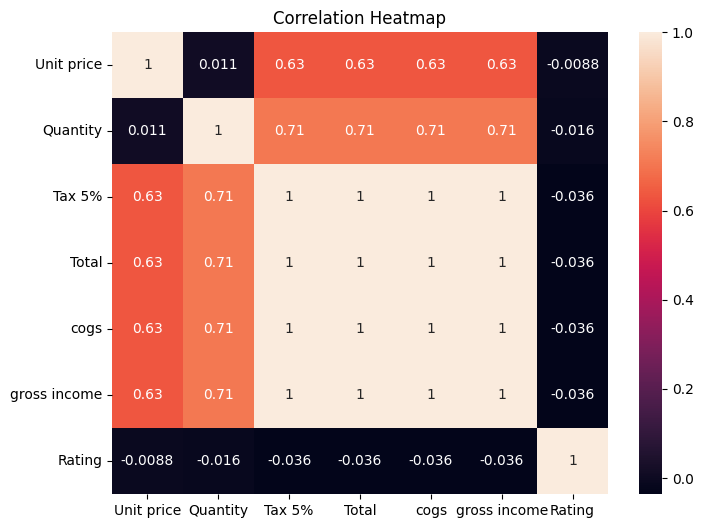

In [83]:
# Heatmap of correlation
plt.figure(figsize=(8,6))
correlation_matrix = df[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()


# **Summary & Insights**

* **Product Insights:** The "Fashion & Accessories" category records the highest sales among all product lines.
  
* **Day of the Week:** Saturday emerges as the most profitable day for sales, indicating a peak in customer spending.
  
* **Gender and Payment Preferences:** Female customers predominantly prefer cash payments, whereas male customers favor e-wallets for transactions.
  
* **Gross Income Contribution:** The "Food and Beverages" category generates the maximum gross income, showcasing its significant impact on overall profitability.
  
* **Branch Performance:** Branch "C" contributes the most to the gross income, highlighting its vital role in driving revenue.
  
* **Sales by Gender:** Female customers lead in total sales compared to their male counterparts, emphasizing their influence on business outcomes.





